Repeat the same steps using a different classifier.

In [1]:
# Import the load_digits to load the handwritten digits dataset
from sklearn.datasets import load_digits

In [2]:
# Load the digits dataset
digits = load_digits()

In [3]:
# print labels of every 50th images in digits dataset
digits.target[::50]

array([0, 2, 4, 0, 1, 4, 7, 7, 4, 4, 8, 6, 2, 4, 2, 6, 4, 5, 4, 3, 1, 1,
       9, 8, 7, 1, 3, 3, 2, 5, 1, 5, 2, 5, 5, 3])

In [4]:
# print the digits dataset shape
digits.data.shape

(1797, 64)

In [5]:
# print the image at index 20
digits.images[20]

array([[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  4., 16.,  9.,  1., 14.,  2.,  0.],
       [ 0.,  4., 16.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0., 16.,  1.,  0., 12.,  8.,  0.],
       [ 0.,  0., 15.,  9.,  0., 13.,  6.,  0.],
       [ 0.,  0.,  9., 14.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  2., 12., 13.,  4.,  0.,  0.]])

In [6]:
# print the label of image at index 20
digits.target[20]

0

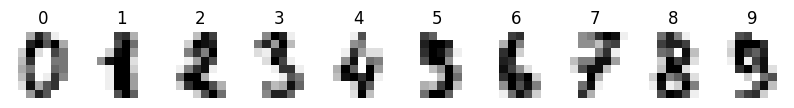

In [7]:
# use matplotlib.pyplot library to print 10 images
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for axes, image, target in zip(axes, digits.images, digits.target):
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_axis_off()
    axes.set_title(target)

In [8]:
#import train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# splits the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)


In [9]:
# print the shape of train dataset
X_train.shape

(1437, 64)

In [10]:
# print the shape of test dataset
X_test.shape

(360, 64)

In [11]:
# import the SVC (Support Vector Classifier) model from sklearn.svm
from sklearn.svm import SVC

In [12]:
# init the svc classifier
svc = SVC()

In [13]:
#train the svc model
svc.fit(X=X_train, y=y_train)

SVC()

In [14]:
# predict labels for the test dataset
predicted = svc.predict(X=X_test)

In [15]:
# compare wth predictions
expected = y_test

In [16]:
# display the first 20 predicted labels
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [17]:
# display the first exprected value 
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [18]:
# create a list of tuples containing mismatches between predictions and expected labels
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [19]:
# display incorrect predictions
wrong

[(5, 3), (9, 7), (7, 9), (7, 3), (8, 3)]

In [20]:
# print the accuracy of the svc model
print(f'{svc.score(X_test, y_test):.2%}')

98.61%


In [21]:
# import confusion matrix to evaluate model performance
from sklearn.metrics import confusion_matrix

In [22]:
# print the confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [23]:
# import classification report
from sklearn.metrics import classification_report

In [24]:
# print the classification report and compare the results with the KNN classifier.
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted,
          target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.93      0.96        41
           4       1.00      1.00      1.00        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      0.97      0.96        36
           8       0.97      1.00      0.99        34
           9       0.97      0.97      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

